<a href="https://colab.research.google.com/github/CHITANDAy/3217/blob/main/COMP3217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP3217 Detection of Attacks on Power System Grids**

Qihao Zhou 35161094

# Part A - Use XGB



By comparing to Support Vector Machine (SVM) and Extreme Gradient Boosting (XGB).
We found XGB had the highest accuracy. The final prediction will be made by xgb model.


# File Upload - You must first upload the training data and testing data via this code block.

Please upload all necessary files here (total 4 files), and keep their name as:

TestingDataBinary.csv

TestingDataMulti.csv

TrainingDataBinary.csv

TrainingDataMulti.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

After upload completed, you shall see files exist at right hand size via clicking the file bar like this.(If you doesn't see it, fresh might be helpful)
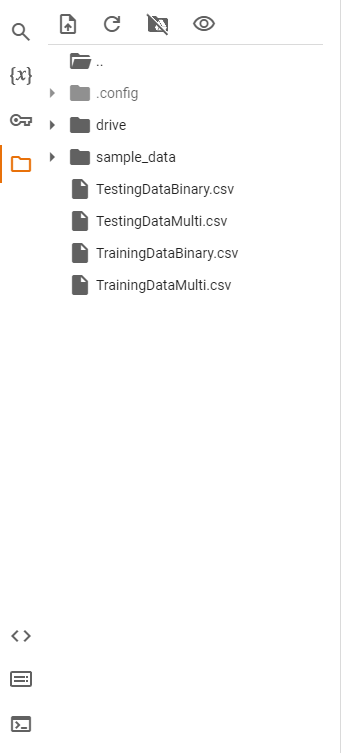


# * XGB - (Run this code block to obtain the Prediction for Part A)!!!!

In [ ]:
# Install required Library
!pip install scikit-optimize
!pip install flaml
!pip install xgboost
# Import the required libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from flaml import AutoML
from xgboost import XGBClassifier

import numpy as np
import pandas as pd


# Load dataset
# train_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataBinary.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataBinary.csv')
train_data = pd.read_csv('/content/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/TestingDataBinary.csv')

# Separate features and labels
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
# Reserver 20% of the Training set as Validation set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Train the ML model
xgb = XGBClassifier(
    n_estimators=5300,
    max_depth=9,
    min_child_weight=2.132965565210401,
    learning_rate=0.16329091261710665,
    subsample=0.8632075728939809,
    colsample_bylevel=0.9000151742140279,
    colsample_bytree=0.5944678975369968,
    reg_alpha=0.004469505961149017,
    reg_lambda=1.054892921445541,
    objective='binary:logistic',
    random_state=30,
    use_label_encoder=False
)

xgb.fit(X_train, y_train)

# Validation
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Confusion Matrix: ", conf_matrix)

# Standardize the test dataset
X_test_scaled = scaler.transform(test_data)

# Make Prediction and save to csv files.

test_pred = xgb.predict(X_test_scaled)

test_data['marker'] = test_pred
test_data.to_csv('/content/TestingResultsBinary.csv', index=False)



Accuracy:  0.9825
Precision:  0.988313856427379
Recall:  0.976897689768977
F1 score:  0.9825726141078839
Confusion Matrix:  [[587   7]
 [ 14 592]]


After the running you shall see the output prediction file.

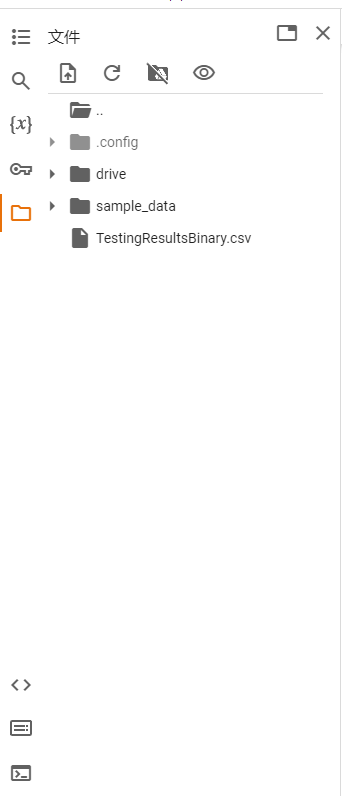

# SVM Method - Using SVM via Grid search find regulation parameter "C" and Gamma based on Radial Basis Function(rbf) kernel.     No need to Execute (You can test and run this part code. This is not the model for prediction)

In [ ]:
# Install required Library
!pip install scikit-optimize
!pip install flaml
!pip install xgboost
# Import the required libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from flaml import AutoML



import numpy as np
import pandas as pd
# Load dataset
# train_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataBinary.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataBinary.csv')
train_data = pd.read_csv('/content/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/TestingDataBinary.csv')

# Separate features and labels
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
# Reserver 20% of the Training set as Validation set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Create SVM and training
svm = SVC(C = 210, gamma = 0.08, kernel = 'rbf')
svm.fit(X_train, y_train)


# Validation
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Confusion Matrix: ", conf_matrix)


Accuracy:  0.9641666666666666
Precision:  0.9637561779242174
Recall:  0.9653465346534653
F1 score:  0.964550700741962
Confusion Matrix:  [[572  22]
 [ 21 585]]


# Optimization SVM - Grid Search Method to find hyperparameters for SVM (not need to execute this code block

The following code block is for computing the best parameters for SVM, No need to run!

In [ ]:
# # The best parametes list
# param_grid = {
#     'C' : [210],
#     'gamma' : [0.08],
#     'kernel' : ['rbf']
# }


# Install required Library
!pip install scikit-optimize
# Import the required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb


import numpy as np
import pandas as pd

# Load dataset
# train_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataBinary.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataBinary.csv')
train_data = pd.read_csv('/content/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/TestingDataBinary.csv')

# Separate features and labels
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
# Reserver 20% of the Training set as Validation set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)


# The optimisation method (no need to run as we already know the result)
svm = SVC()
param_grid_svm = {
    'C' : [1, 10, 100, 200, 210, 800, 2100, 2200, 2300, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900],
    'gamma' : [1000 ,100, 10,1, 0.1, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.001],
    'kernel' : ['rbf']
}

# Using Grid search to compute the best parameters for SVM
grid_search = GridSearchCV(svm, param_grid_svm, cv = 5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_para = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_para}")
print(f"Best accuracy score: {best_score}")

KeyboardInterrupt: 

# Optimization XGB - Via AutoML library to found best parameters for xgb model (not need to execute this code block)

In [ ]:
# Install required Library
!pip install scikit-optimize
!pip install flaml
!pip install xgboost
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from flaml import AutoML
from xgboost import XGBClassifier
import numpy as np
import pandas as pd


autoxgb = AutoML()

# Load dataset
# train_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataBinary.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataBinary.csv')
train_data = pd.read_csv('/content/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/TestingDataBinary.csv')

# Separate features and labels
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
# Reserver 20% of the Training set as Validation set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Parameters
params = {
    "time_budget": 4000,     # Running Time in second 4000 secs
    "metric": 'accuracy',     # Optimization by accuracy
    "task": 'classification',   # Task Type
    "estimator_list": ["xgboost"],   # Specify the model as Random Forest
    "seed": 478914
}

autoxgb.fit(X_train, y_train, **params)

print('Best hyperparmeter: ', autoxgb.best_config)
print('Accuracy: {0:.4g}'.format(1 - autoxgb.best_loss))

[flaml.automl.logger: 05-06 18:48:06] {1680} INFO - task = classification
[flaml.automl.logger: 05-06 18:48:06] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 05-06 18:48:06] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-06 18:48:06] {1901} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 05-06 18:48:06] {2219} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 05-06 18:48:07] {2345} INFO - Estimated sufficient time budget=3799s. Estimated necessary time budget=4s.
[flaml.automl.logger: 05-06 18:48:07] {2392} INFO -  at 0.4s,	estimator xgboost's best error=0.1448,	best estimator xgboost's best error=0.1448
[flaml.automl.logger: 05-06 18:48:07] {2219} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 05-06 18:48:07] {2392} INFO -  at 0.8s,	estimator xgboost's best error=0.1183,	best estimator xgboost's best error=0.1183
[flaml.automl.logger: 05-06 18:48:07] {2219} INFO - iteration 2, curren

KeyboardInterrupt: 

# Part B - * Use Random Forest

Using random forest to make prediction (Run this block to obtain part b prediction)

In [ ]:
# Install required Library
!pip install scikit-optimize
!pip install flaml
!pip install xgboost
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from flaml import AutoML

import numpy as np
import pandas as pd

# Load dataset
# train_data_multi = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataMulti.csv')
# test_data_multi = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataMulti.csv')
train_data_multi = pd.read_csv('/content/TrainingDataMulti.csv')
test_data_multi = pd.read_csv('/content/TestingDataMulti.csv')

# Separate features and labels
X = train_data_multi.iloc[:, :-1]
Y = train_data_multi.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled_multi = scaler.fit_transform(X)

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_scaled_multi, Y, test_size=0.2, random_state=30)

# Randomforest Training
randomforest = RandomForestClassifier(
    n_estimators=218,
    max_features =0.08838834764831843,
    max_leaf_nodes = 2052,
    criterion = 'gini',
)
randomforest.fit(X_train_multi, y_train_multi)

# Validation
y_pred_multi = randomforest.predict(X_test_multi)
accuracy = accuracy_score(y_test_multi, y_pred_multi)


print("Accuracy: ", accuracy)


# Output the Prediction outcome for testing dataset
# Standardize the test dataset
X_test_scaled_multi = scaler.transform(test_data_multi)

# Make Prediction and Output the outcome
test_pred_multi = randomforest.predict(X_test_scaled_multi)
test_data_multi['marker'] = test_pred_multi
test_data_multi.to_csv('/content/TestingResultsMulti.csv', index=False)

Accuracy:  0.9466666666666667


# Optimization Method for Random Forest (not need to execute this code block)

In [ ]:
# Install required Library
!pip install scikit-optimize
!pip install flaml
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from flaml import AutoML
import numpy as np
import pandas as pd


autorf = AutoML()

# Load dataset
# train_data_multi = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TrainingDataMulti.csv')
# test_data_multi = pd.read_csv('https://raw.githubusercontent.com/CHITANDAy/3217/main/TestingDataMulti.csv')
train_data_multi = pd.read_csv('/content/TrainingDataMulti.csv')
test_data_multi = pd.read_csv('/content/TestingDataMulti.csv')

# Separate features and labels
X = train_data_multi.iloc[:, :-1]
Y = train_data_multi.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled_multi = scaler.fit_transform(X)

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_scaled_multi, Y, test_size=0.2, random_state=30)

# Parameters
params = {
    "time_budget": 10000,     # Running Time in second 10000 secs
    "metric": 'accuracy',     # Optimization by accuracy
    "task": 'classification',   # Task Type
    "estimator_list": ["rf"],   # Specify the model as Random Forest
    "seed": 478914
}

autorf.fit(X_train_multi, y_train_multi, **params)

print('Best hyperparmeter: ', autorf.best_config)
print('Accuracy: {0:.4g}'.format(1 - autorf.best_loss))

[flaml.automl.logger: 05-07 12:54:30] {1680} INFO - task = classification
[flaml.automl.logger: 05-07 12:54:30] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 05-07 12:54:30] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-07 12:54:30] {1901} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 05-07 12:54:30] {2219} INFO - iteration 0, current learner rf
[flaml.automl.logger: 05-07 12:54:31] {2345} INFO - Estimated sufficient time budget=9294s. Estimated necessary time budget=9s.
[flaml.automl.logger: 05-07 12:54:31] {2392} INFO -  at 1.0s,	estimator rf's best error=0.5015,	best estimator rf's best error=0.5015
[flaml.automl.logger: 05-07 12:54:31] {2219} INFO - iteration 1, current learner rf
[flaml.automl.logger: 05-07 12:54:32] {2392} INFO -  at 2.2s,	estimator rf's best error=0.3615,	best estimator rf's best error=0.3615
[flaml.automl.logger: 05-07 12:54:32] {2219} INFO - iteration 2, current learner rf
[flaml.automl.logger: 